# Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid", context="notebook")
%matplotlib inline


# Loading Dataset

In [2]:
df = pd.read_csv("train.csv")

print(df.shape)
df.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Quick Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.shape

(891, 12)

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Missing Values

In [9]:
print("\nMissing Values (count & %):")
missing_count = df.isna().sum()
missing_pct = (missing_count / len(df) * 100).round(2)
missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_%": missing_pct
}).sort_values("missing_%", ascending=False)
missing_table



Missing Values (count & %):


,missing_count,missing_%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Name,0,0.00
Pclass,0,0.00
Survived,0,0.00
Sex,0,0.00
Parch,0,0.00
SibSp,0,0.00


# Basic Cleaining

# Handling Missing Values

In [11]:
df_clean = df.copy()

#  Fill Embarked (mode)
if df_clean["Embarked"].isna().any():
    df_clean["Embarked"].fillna(df_clean["Embarked"].mode(dropna=True)[0], inplace=True)


C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_15356\404839022.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["Embarked"].fillna(df_clean["Embarked"].mode(dropna=True)[0], inplace=True)


In [12]:
# Use group median by (Sex, Pclass); fallback to global median for any leftover NA
age_group_median = df_clean.groupby(["Sex", "Pclass"])["Age"].transform("median")
df_clean["Age"] = df_clean["Age"].fillna(age_group_median)
df_clean["Age"] = df_clean["Age"].fillna(df_clean["Age"].median())

In [13]:
# Fare (rare in train, but handle just in case)
if df_clean["Fare"].isna().any():
    df_clean["Fare"].fillna(df_clean["Fare"].median(), inplace=True)


In [14]:
 # Keep original but add 'HasCabin' (1/0)
df_clean["HasCabin"] = df_clean["Cabin"].notna().astype(int)

In [15]:
# Family features
df_clean["FamilySize"] = df_clean["SibSp"] + df_clean["Parch"] + 1
df_clean["IsAlone"] = (df_clean["FamilySize"] == 1).astype(int)

# Converting Data Types

In [16]:
# Convert types for categoricals
for col in ["Pclass", "Sex", "Embarked"]:
    df_clean[col] = df_clean[col].astype("category")


In [17]:
# Make a readable Survived label for plots/tables
df_clean["SurvivedLabel"] = df_clean["Survived"].map({0: "Died", 1: "Survived"}).astype("category")

In [18]:
# Verify after cleaning
print("\nAfter cleaning — missing values left?")
df_clean.isna().sum()



After cleaning — missing values left?


PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
HasCabin           0
FamilySize         0
IsAlone            0
SurvivedLabel      0
dtype: int64

In [19]:
df_clean["HasCabin"] = df_clean["Cabin"].notna().astype(int)


In [20]:
df_clean["Deck"] = df_clean["Cabin"].str[0]
df_clean["Deck"] = df_clean["Deck"].fillna("Unknown")


# Summary statistics

In [25]:

print("Numeric columns summary:")
display(df_clean.select_dtypes(include=[np.number]).describe().T)

print("\nCategorical value counts (top 5 for each):")
categoricals = ["SurvivedLabel", "Pclass", "Sex", "Embarked"]
for c in categoricals:
    print(f"\n{c}:\n", df_clean[c].value_counts(dropna=False).head())



Numeric columns summary:


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Age,891.0,29.112424,13.304424,0.42,21.5000,26.0000,36.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
HasCabin,891.0,0.228956,0.420397,0.00,0.0000,0.0000,0.0,1.0000
FamilySize,891.0,1.904602,1.613459,1.00,1.0000,1.0000,2.0,11.0000
IsAlone,891.0,0.602694,0.489615,0.00,0.0000,1.0000,1.0,1.0000



Categorical value counts (top 5 for each):

SurvivedLabel:
 SurvivedLabel
Died        549
Survived    342
Name: count, dtype: int64

Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex:
 Sex
male      577
female    314
Name: count, dtype: int64

Embarked:
 Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


# Group-based insights

In [26]:

# Overall survival rate
overall_survival = df_clean["Survived"].mean()
print(f"Overall survival rate: {overall_survival:.2%}")

Overall survival rate: 38.38%


In [28]:

# Survival rate by Sex
survival_by_sex = df_clean.groupby("Sex")["Survived"].mean().sort_values(ascending=False).to_frame("SurvivalRate")
survival_by_sex["SurvivalRate(%)"] = (survival_by_sex["SurvivalRate"] * 100).round(2)
display(survival_by_sex)

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_15356\3843972329.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_sex = df_clean.groupby("Sex")["Survived"].mean().sort_values(ascending=False).to_frame("SurvivalRate")


,SurvivalRate,SurvivalRate(%)
Sex,,
female,0.742038,74.20
male,0.188908,18.89


In [29]:
# Survival rate by Pclass
survival_by_pclass = df_clean.groupby("Pclass")["Survived"].mean().to_frame("SurvivalRate")
survival_by_pclass["SurvivalRate(%)]"] = (survival_by_pclass["SurvivalRate"] * 100).round(2)
display(survival_by_pclass)

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_15356\1664723294.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_pclass = df_clean.groupby("Pclass")["Survived"].mean().to_frame("SurvivalRate")


,SurvivalRate,SurvivalRate(%)]
Pclass,,
1,0.629630,62.96
2,0.472826,47.28
3,0.242363,24.24


In [30]:
# Survival rate by Embarked
survival_by_embarked = df_clean.groupby("Embarked")["Survived"].mean().to_frame("SurvivalRate")
survival_by_embarked["SurvivalRate(%)"] = (survival_by_embarked["SurvivalRate"] * 100).round(2)
display(survival_by_embarked)

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_15356\3698639312.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_embarked = df_clean.groupby("Embarked")["Survived"].mean().to_frame("SurvivalRate")


,SurvivalRate,SurvivalRate(%)
Embarked,,
C,0.553571,55.36
Q,0.389610,38.96
S,0.339009,33.90


In [31]:
# Cross-tabs (normalized)
print("\nSurvival by Sex (row-normalized):")
display(pd.crosstab(df_clean["Sex"], df_clean["SurvivedLabel"], normalize="index").round(3))


Survival by Sex (row-normalized):


SurvivedLabel,Died,Survived
Sex,,
female,0.258,0.742
male,0.811,0.189


In [32]:
print("\nSurvival by Pclass (row-normalized):")
display(pd.crosstab(df_clean["Pclass"], df_clean["SurvivedLabel"], normalize="index").round(3))


Survival by Pclass (row-normalized):


SurvivedLabel,Died,Survived
Pclass,,
1,0.370,0.630
2,0.527,0.473
3,0.758,0.242


In [33]:
print("\nSurvival by (Pclass x Sex) (row-normalized):")
display(pd.crosstab([df_clean["Pclass"], df_clean["Sex"]], df_clean["SurvivedLabel"], normalize="index").round(3))


Survival by (Pclass x Sex) (row-normalized):


SurvivedLabel   Died  Survived
Pclass Sex                    
1      female  0.032     0.968
       male    0.631     0.369
2      female  0.079     0.921
       male    0.843     0.157
3      female  0.500     0.500
       male    0.865     0.135

# Visualizations

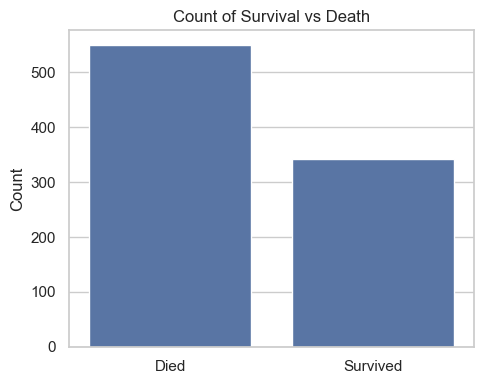

In [34]:
# counts & survival rate bar plots
plt.figure(figsize=(5,4))
sns.countplot(data=df_clean, x="SurvivedLabel")
plt.title("Count of Survival vs Death")
plt.xlabel("")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_15356\367193464.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_sex_plot = df_clean.groupby("Sex")["Survived"].mean().reset_index(name="SurvivalRate")


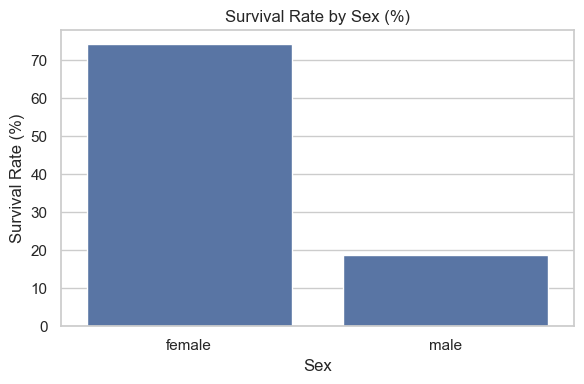

In [35]:
# Survival rate by Sex (Bar)
surv_sex_plot = df_clean.groupby("Sex")["Survived"].mean().reset_index(name="SurvivalRate")
surv_sex_plot["SurvivalRate"] *= 100
plt.figure(figsize=(6,4))
sns.barplot(data=surv_sex_plot, x="Sex", y="SurvivalRate")
plt.title("Survival Rate by Sex (%)")
plt.ylabel("Survival Rate (%)")
plt.tight_layout()
plt.show()


C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_15356\2306028273.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_pclass_plot = df_clean.groupby("Pclass")["Survived"].mean().reset_index(name="SurvivalRate")


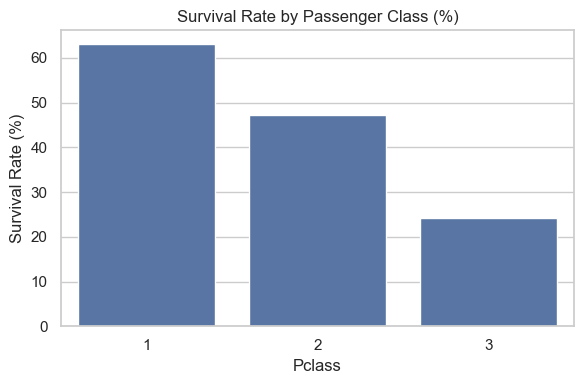

In [37]:
# Survival rate by Pclass (Bar)
surv_pclass_plot = df_clean.groupby("Pclass")["Survived"].mean().reset_index(name="SurvivalRate")
surv_pclass_plot["SurvivalRate"] *= 100
plt.figure(figsize=(6,4))
sns.barplot(data=surv_pclass_plot, x="Pclass", y="SurvivalRate")
plt.title("Survival Rate by Passenger Class (%)")
plt.ylabel("Survival Rate (%)")
plt.tight_layout()
plt.show()

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_15356\3674916635.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_emb_plot = df_clean.groupby("Embarked")["Survived"].mean().reset_index(name="SurvivalRate")


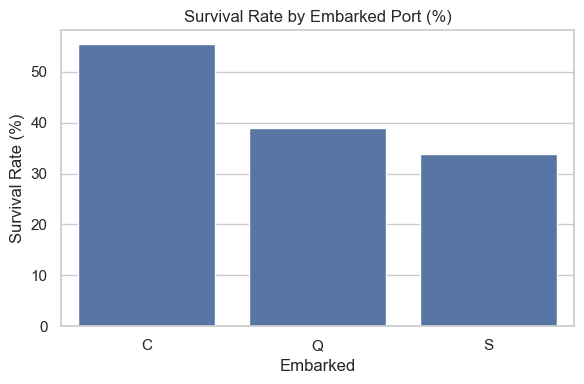

In [38]:
# Survival rate by Embarked (Bar)
surv_emb_plot = df_clean.groupby("Embarked")["Survived"].mean().reset_index(name="SurvivalRate")
surv_emb_plot["SurvivalRate"] *= 100
plt.figure(figsize=(6,4))
sns.barplot(data=surv_emb_plot, x="Embarked", y="SurvivalRate")
plt.title("Survival Rate by Embarked Port (%)")
plt.ylabel("Survival Rate (%)")
plt.tight_layout()
plt.show()

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_15356\3738350947.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_ps = df_clean.groupby(["Pclass","Sex"])["Survived"].mean().reset_index(name="Rate")


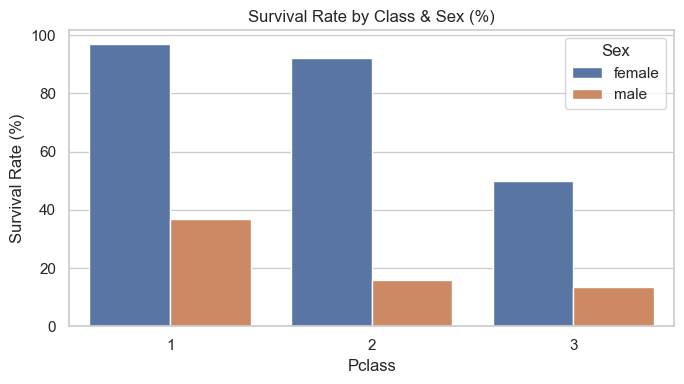

In [39]:
# Grouped: Survival rate by Pclass & Sex
surv_ps = df_clean.groupby(["Pclass","Sex"])["Survived"].mean().reset_index(name="Rate")
surv_ps["Rate"] *= 100
plt.figure(figsize=(7,4))
sns.barplot(data=surv_ps, x="Pclass", y="Rate", hue="Sex")
plt.title("Survival Rate by Class & Sex (%)")
plt.ylabel("Survival Rate (%)")
plt.tight_layout()
plt.show()

# Heatmaps

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_15356\595542564.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_ps = df_clean.pivot_table(index="Pclass", columns="Sex", values="Survived", aggfunc="mean")


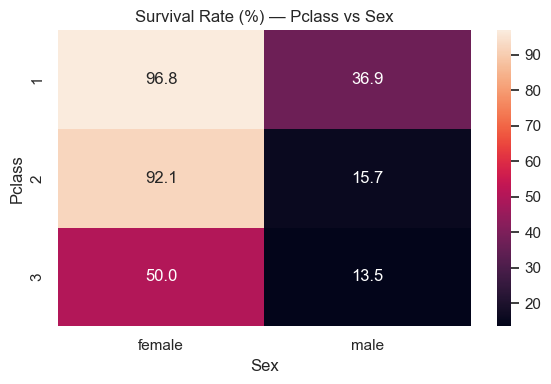

In [40]:
#  Survival rate heatmap (Pclass x Sex)
pivot_ps = df_clean.pivot_table(index="Pclass", columns="Sex", values="Survived", aggfunc="mean")
plt.figure(figsize=(6,4))
sns.heatmap((pivot_ps*100).round(1), annot=True, fmt=".1f")
plt.title("Survival Rate (%) — Pclass vs Sex")
plt.ylabel("Pclass")
plt.xlabel("Sex")
plt.tight_layout()
plt.show()

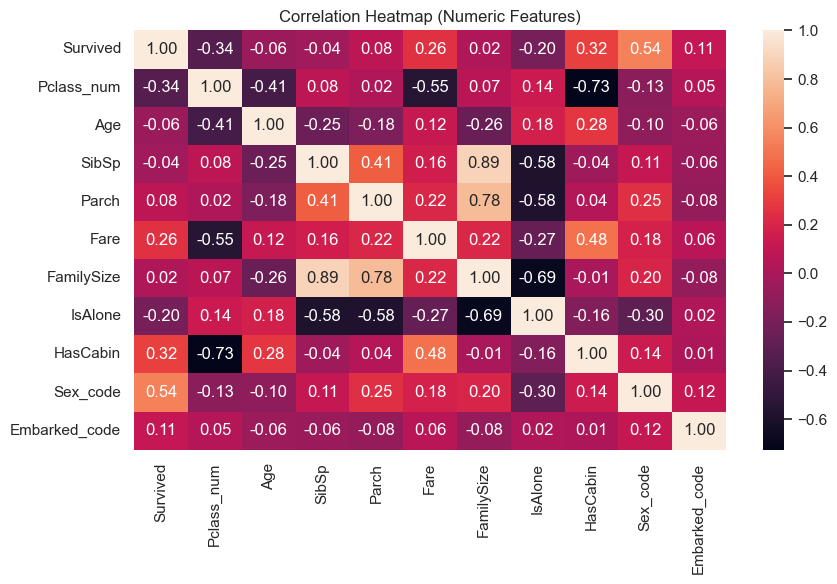

In [41]:
#  Correlation heatmap (numeric-only)
# Encode a few categoricals for correlation
df_corr = df_clean.copy()
df_corr["Pclass_num"] = df_corr["Pclass"].cat.codes + 1
df_corr["Sex_code"] = df_corr["Sex"].map({"female":1, "male":0}).astype(int)
df_corr["Embarked_code"] = df_corr["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)

num_cols = [
    "Survived", "Pclass_num", "Age", "SibSp", "Parch", "Fare",
    "FamilySize", "IsAlone", "HasCabin", "Sex_code", "Embarked_code"
]
corr = df_corr[num_cols].corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True, fmt=".2f", square=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


# A couple more useful visuals

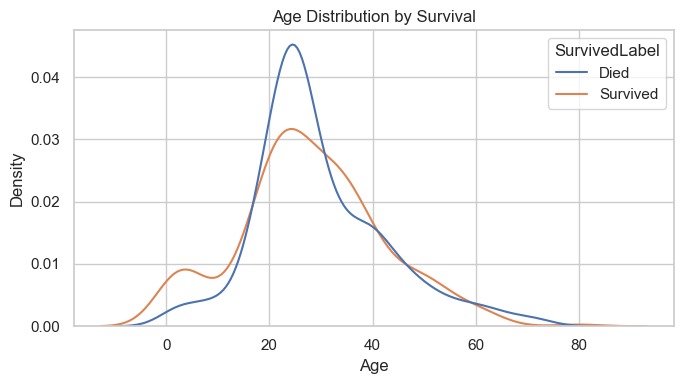

In [44]:
#  A couple more useful visuals 
# Age distributions by survival
plt.figure(figsize=(7,4))
sns.kdeplot(data=df_clean, x="Age", hue="SurvivedLabel", common_norm=False)
plt.title("Age Distribution by Survival")
plt.tight_layout()
plt.show()

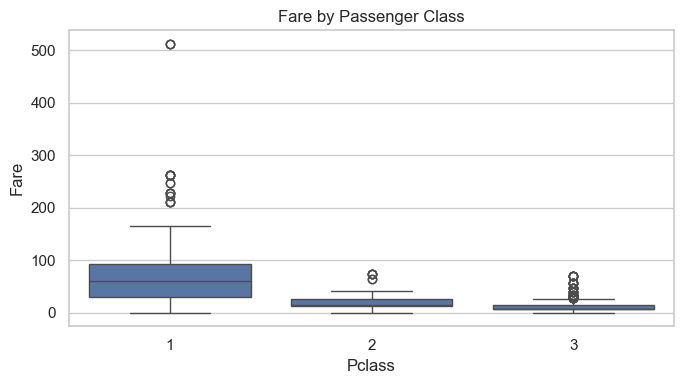

In [45]:
# Fare distributions by class
plt.figure(figsize=(7,4))
sns.boxplot(data=df_clean, x="Pclass", y="Fare")
plt.title("Fare by Passenger Class")
plt.tight_layout()
plt.show()

# Data Saving

In [46]:
df_clean.to_csv("train_clean.csv", index=False)
print("Saved: train_clean.csv")


Saved: train_clean.csv
